# E-commerce Customer Behavior Analysis

A study on purchase frequency, recurring customers, and sales distribution.

# 1. Introduction

In this project, I analyze sales data from a real e-commerce platform to understand customer behavior over time.

The key analytical questions I aim to answer are:

- How many customers make repeat purchases?
- What is the split between one-time and recurring customers?
- Are there high-value "VIP" customers?
- How are purchases distributed per customer?
- How does customer activity evolve over time?
- Which products generate the most revenue?

# 2. Dataset Description

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data.csv", encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.shape

(541909, 8)

In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='str')

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


# 3. Data Cleaning and Preprocessing

In [17]:
df.isnull().sum() #Missing data management

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [6]:
df = df.dropna(subset=["CustomerID"])

In [18]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)] #Removing outliers

In [19]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #Datetime conversion

In [7]:
df.info()

<class 'pandas.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  str           
 1   StockCode    406829 non-null  str           
 2   Description  406829 non-null  str           
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[us]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), str(4)
memory usage: 27.9 MB


# 4. Exploratory Data Analysis

In [20]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"] #New feature

In [ ]:
orders_per_customer = df.groupby("CustomerID")["InvoiceNo"].nunique() #Purchase frequency
orders_per_customer.head()

CustomerID
12346.0    1
12347.0    7
12348.0    4
12349.0    1
12350.0    1
Name: InvoiceNo, dtype: int64

In [11]:
repeat_customers = (orders_per_customer > 1).sum()
total_customers = orders_per_customer.shape[0]
repeat_customers, total_customers

(np.int64(2845), 4338)

Here, I distinguish between users who bought only once and those who returned to the store. Identifying recurring customers is vital: a small percentage of loyal users often drives the majority of long-term business growth.

In [21]:
orders_per_customer.value_counts().head(10) #One-time vs. Recurring customers

InvoiceNo
1     1493
2      835
3      508
4      388
5      242
6      172
7      143
8       98
9       68
10      54
Name: count, dtype: int64

In [22]:
customer_revenue = ( #Big spenders
    df.groupby("CustomerID")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
)

In [23]:
customer_revenue.describe() #Purchase distribution per customer

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: TotalPrice, dtype: float64

In this section, I shift the focus from the number of items sold to the economic value of transactions. This analysis is crucial to determine if the business is well-balanced or heavily dependent on a small circle of high-value products and customers. As we will see, unlike physical volumes, revenue is highly concentrated.

In [25]:
top_10percent_count = int(len(customer_revenue) * 0.1) #Number of top 10% customers

top_10_revenue = customer_revenue.head(top_10percent_count).sum() #Revenue generated by the top 10% of customers
total_revenue = customer_revenue.sum()

percentage_revenue = (top_10_revenue / total_revenue) * 100
percentage_revenue

np.float64(61.334117110121674)

As we can see, unlike sales volumes, revenue is highly concentrated in the hands of a small circle of 'VIP' customers.

In [26]:
monthly_revenue = (   #Sales timeline analysis
    df.groupby(df["InvoiceDate"].dt.to_period("M"))["TotalPrice"]
    .sum()
)
monthly_revenue 

InvoiceDate
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: TotalPrice, dtype: float64

In [27]:
top_products = ( #Top products by revenue
    df.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products 

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

# 5. Data Visualization

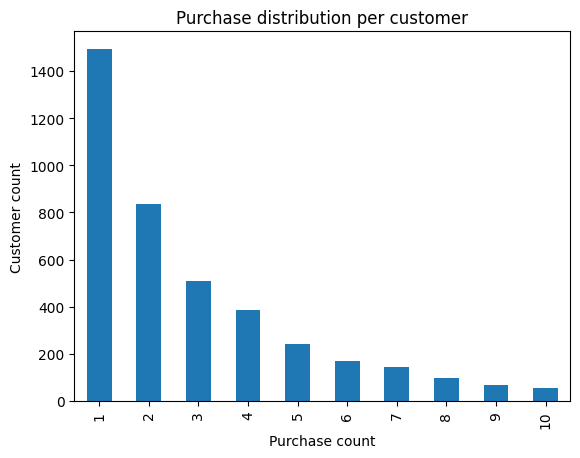

In [28]:
orders_per_customer.value_counts().head(10).plot(kind="bar")
plt.title("Purchase distribution per customer")
plt.xlabel("Purchase count")
plt.ylabel("Customer count")
plt.show()

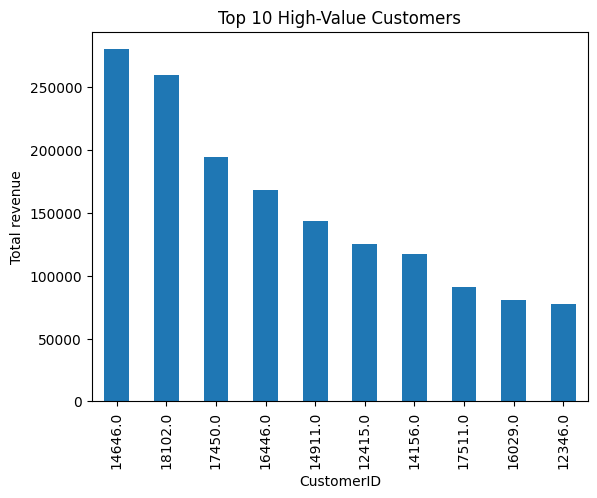

In [29]:
customer_revenue.sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 High-Value Customers")
plt.ylabel("Total revenue")
plt.show()

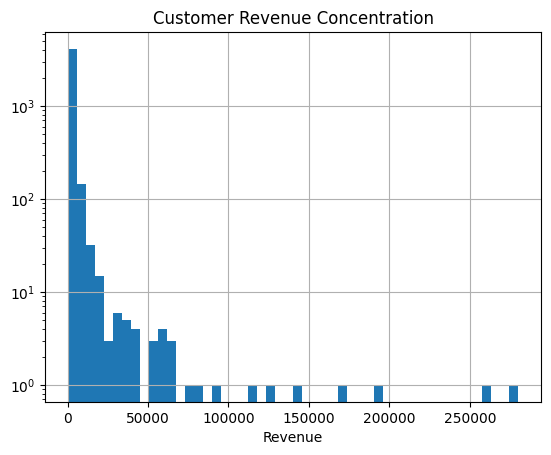

In [30]:
df.groupby("CustomerID")["TotalPrice"].sum().hist(
    bins=50,
    log=True
)
plt.title("Customer Revenue Concentration")
plt.xlabel("Revenue")
plt.show()

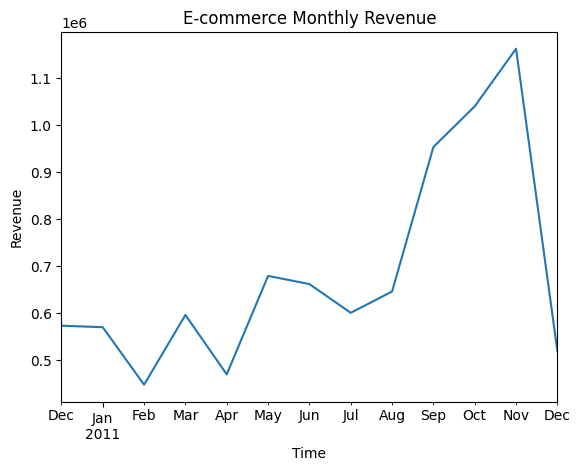

In [31]:
monthly_revenue.plot()
plt.title("E-commerce Monthly Revenue")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.show()

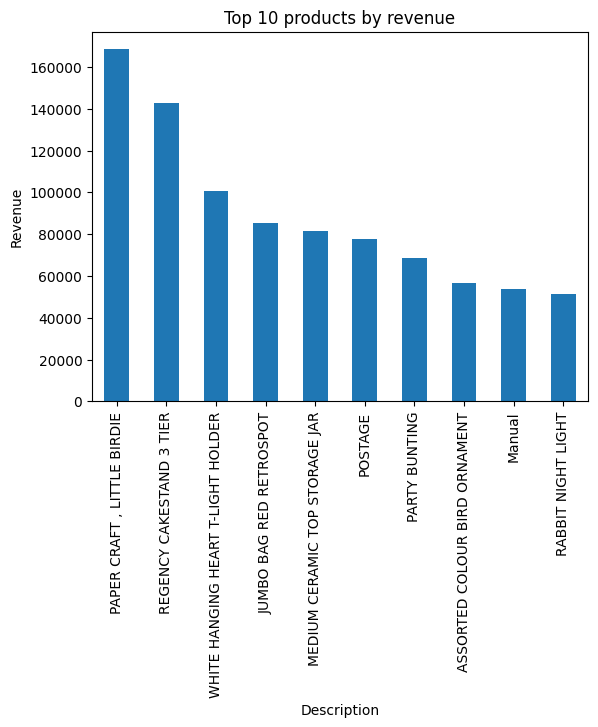

In [32]:
top_products.plot(kind="bar")
plt.title("Top 10 products by revenue")
plt.ylabel("Revenue")
plt.show()

# 6. Conclusions

The analysis of purchasing behavior has revealed a very clear reality: this e-commerce business relies on a small group of loyal customers.

The most critical finding is that the top 10% of customers generate approximately 61% of total revenue. This indicates a significant imbalance: the vast majority of earnings depend on a very narrow circle of individuals. Even though one-time buyers are numerous, their economic impact is marginal compared to recurring customers. This demonstrates that not all customers hold the same value: in terms of revenue, one loyal customer is worth significantly more than ten new users who only purchase once. Therefore, the top priority for this store should not only be acquiring new users but focusing more on retaining existing ones.

In summary: The shift from volume analysis to revenue analysis has unveiled the true engine of this e-commerce: a system driven by high loyalty. This makes the business highly profitable but also vulnerable, as losing even a few of these 'top' customers would lead to a substantial drop in revenue.
